# Field line tracing

Here is some starter code to set up field line tracing in Python.

## Homework Part 1 (getting things set up -- part 2 to follow later)

* Set up an environment where you can run Python code and generate plots (My preference would be a single Jupyter notebook, but it is fine to instead have a regular Python script that generates plots, in which case, those plots should be part of your submission -- e.g., attach PNGs).

* Get the code below (or something equivalent) to run. Copy&paste is fine.

* Review the `trace_field_line()` function and explain how it works.

* Add more seed points to improve the visualization of the dipole field.

* Submit your code and the generated plots.

In [1]:
# import the basic libraries we'll use
# Note: This could be done without pandas, but it makes things a bit neater, since
# we can store not just columns of numbers, but also what they mean.

import numpy as np
import pandas as pd
import scipy.integrate

In [2]:
# Here are some sample magnetic fields
#
# The code expects a function B(t, x) that takes a time t and a position x
# (a length-3 numpy array) and returns the magnetic field B at that point
# (also a length-3 numpy array).

def B_uniform(t, x):
    return np.array([0., 0., 1.])  # uniform B field in z direction

def B_dipole(t, x):
    m = np.array([0., 0., 1.])  # magnetic moment
    # dipole field formula
    return 3*x*np.dot(x, m) / np.linalg.norm(x)**5 - m / np.linalg.norm(x)**3


In [3]:
def trace_field_line(r0, get_B, r_min=0.5, r_max=10.0):
    """Trace a magnetic field line starting at position r0 in the field
     provided by the get_B function.

     This function integrates the field line in the positive direction
     until it get either closer than `r_min` to the origin, or outside of `r_max`.
     
     Returns a pandas DataFrame with columns 'time', 'x', 'y', 'z'.
     """
    def rhs(t, x):
        B = get_B(t, x)
        B /= np.linalg.norm(B)
        return B
    
    def outside(t, x):
        return np.linalg.norm(x) - r_max  # stop if r > r_max
    outside.terminal = True
    outside.direction = 1  # only trigger when approaching from inside

    def inside(t, x):
        return np.linalg.norm(x) - r_min  # stop if r < r_min
    inside.terminal = True
    inside.direction = -1  # only trigger when approaching from outside
        
    t = (0., 20.) # integrate up to time 20 -- That's kinda arbitrary, but usually is long enough
    sol = scipy.integrate.solve_ivp(rhs, t, r0, events=[outside, inside], max_step = .2)
    df = pd.DataFrame(np.column_stack((sol.t, sol.y.T)), columns=['time', 'x', 'y', 'z'])
    return df

def trace_field_lines(seeds, B_func, integrate_kwargs):
    """Trace multiple field lines.
    
    This is a convenience wrapper around trace_field_line.
    `seeds` is a list of starting positions.
    `B_func` is the magnetic field function.
    `integrate_kwargs` is a dictionary of additional keyword arguments to pass to
    `trace_field_line`.
    
    Returns a list of pandas DataFrames, one per seed point."""
    return [trace_field_line(r0, B_func, **integrate_kwargs) for r0 in seeds]

In [4]:
# Pick a bunch of seed points and trace field lines

theta = np.pi / 8
seeds = [np.array([np.cos(phi)*np.sin(theta), np.sin(phi)*np.sin(theta), np.cos(theta)]) 
        for phi in np.linspace(0., 2.*np.pi, 10, endpoint=False)]

dfs = trace_field_lines(seeds, B_dipole, integrate_kwargs={"r_min": 0.2, "r_max": 10.0})

In [5]:
dfs[0]  # show the first traced field line as an example of what a numerically traced field line looks like

,time,x,y,z
0,0.000000,0.382683,0.0,0.923880
1,0.100182,0.440284,0.0,1.005842
2,0.300182,0.562569,0.0,1.164066
3,0.500182,0.693758,0.0,1.314992
4,0.700182,0.833029,0.0,1.458499
...,...,...,...,...
85,16.900182,0.343153,0.0,-0.864258
86,17.100182,0.240291,0.0,-0.692782
87,17.300182,0.150083,0.0,-0.514336
88,17.500182,0.075032,0.0,-0.329026


In [6]:
# Here are helpers to use pyvista to visualize the traced field lines
# If you don't have / don't like pyvista, you can use matplotlib or whatever you prefer (see also below)

import pyvista as pv

def to_mesh_lines(df):
    positions = df[['x', 'y', 'z']].values
    mesh = pv.PolyData(positions)
    lines = pv.lines_from_points(positions)
    return mesh, lines

def plot_lp(plotter, df, lines_only=False):
    mesh, lines = to_mesh_lines(df)
    plotter.add_mesh(lines, line_width=1, color='blue')
    if not lines_only:
        #plotter.add_mesh(mesh, point_size=5.0, color='blue', render_points_as_spheres=True)
        plotter.add_mesh(mesh, point_size=5.0, scalars=df['time'], cmap='jet', render_points_as_spheres=True)

def plot_field_lines(plotter, dfs):
    for df in dfs:
        plot_lp(plotter, df)


libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast
2025-09-19 08:24:41.139 (   4.442s) [    7DF5712F8440]vtkXOpenGLRenderWindow.:730   WARN| vtkXOpenGLRenderWindow (0x12cf1800): Cannot create GLX context.
2025-09-19 08:24:41.140 (   4.444s) [    7DF5712F8440]vtkOpenGLRenderWindow.c:920   WARN| vtkXOpenGLRenderWindow (0x12cf1800): Failed to initialize OpenGL functions!
2025-09-19 08:24:41.140 (   4.444s) [    7DF5712F8440]vtkOpenGLRenderWindow.c:939   WARN| vtkXOpenGLRenderWindow (0x12cf1800): Unable to find a valid 

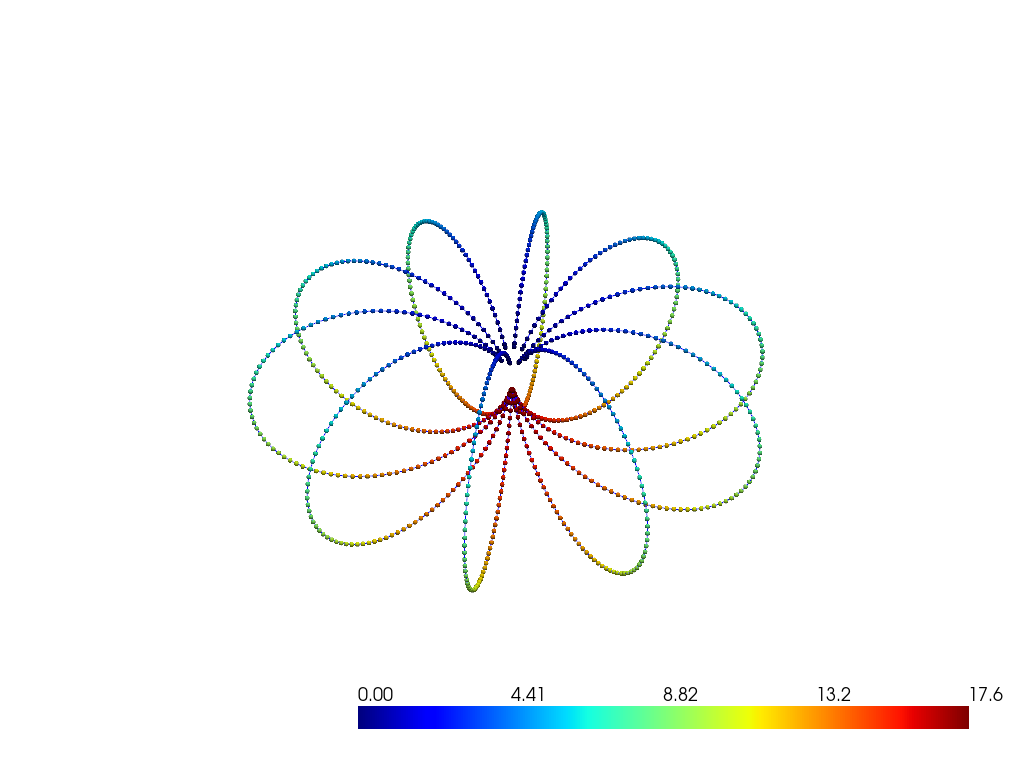

In [7]:
# Make it so that the pyvista plot shows up in the notebook on github -- comment this out for interactive use
pv.set_jupyter_backend('static')

p = pv.Plotter()
plot_field_lines(p, dfs)
p.show()

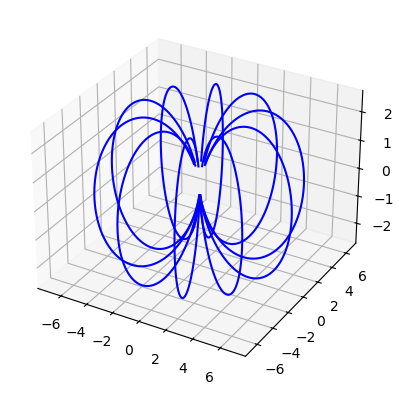

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for df in dfs:
    ax.plot(df['x'], df['y'], df['z'], color='blue')
